In [10]:
import pandas as pd
import numpy as np
from pylab import *

In [2]:
df= pd.read_pickle("../data/clean_rows_df.pkl")  
df.head()

,VoltageCurve,CurrentCurve,spotName
TimeStamp,,,
2019-11-07 12:29:06,"[132, 744, 1299, 1663, 1894, 2002, 2068, 2110,...","[311, 1990, 3577, 4759, 5599, 6190, 6594, 6999...",60000_0_00
2019-11-07 12:29:26,"[136, 752, 1308, 1675, 1923, 2068, 2128, 2180,...","[301, 1961, 3470, 4527, 5432, 6066, 6489, 6911...",60000_0_00
2019-11-07 12:29:26,"[139, 757, 1292, 1655, 1885, 2042, 2099, 2099,...","[333, 2058, 3663, 4814, 5661, 6388, 6842, 7084...",60000_0_00
2019-11-07 12:29:30,"[133, 743, 1286, 1645, 1887, 2046, 2104, 2104,...","[307, 2031, 3632, 4802, 5695, 6434, 6865, 7142...",60000_0_00
2019-11-07 12:29:32,"[137, 755, 1313, 1683, 1906, 2043, 2147, 2189,...","[302, 1995, 3508, 4596, 5382, 5987, 6562, 6955...",60000_0_00


In [3]:
df.reset_index(inplace=True)
df.set_index(["spotName","TimeStamp"],inplace=True)

In [4]:
exploded_voltage=pd.DataFrame(df.VoltageCurve.tolist(), index= df.index)

0     136.0
1     752.0
2    1308.0
3    1675.0
4    1923.0
5    2068.0
6    2128.0
7    2180.0
8    2180.0
9    2103.0
Name: (60000_0_00, 2019-11-07 12:29:26), dtype: float64


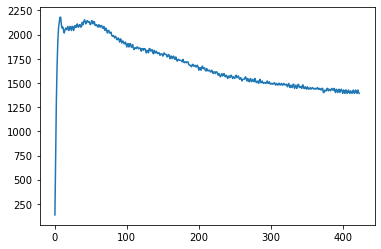

In [11]:
curva=exploded_voltage.iloc[1]
#curva=curva[pd.notnull(curva)]
print(curva.head(10))
plot(curva)

indice del primo valore per cui l'inclinazione della curva inizia a diventare negativa
Escludere i valori precedenti a questo indice per analizzare la curva

In [6]:
#indice del primo valore per cui l'inclinazione della curva diventa negativa
position=curva.diff()[curva.diff()==next(x for x in curva.diff() if x < 0)].index[0]

9     2103.0
10    2068.0
11    2077.0
12    2043.0
13    2017.0
14    2051.0
15    2068.0
16    2051.0
17    2068.0
18    2085.0
Name: (60000_0_00, 2019-11-07 12:29:26), dtype: float64


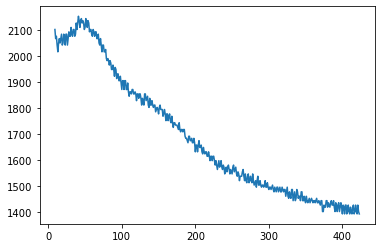

In [12]:
#curva_new è la curva senza il primo picco
curva_new=curva.iloc[position:]
print(curva_new.head(10))
plot(curva_new)